In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
X = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/fake_data1.csv')
X = X[0:144]
X['Price'] = np.log10(X['Price'])

FileNotFoundError: ignored

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/fake_data1.csv')
X = X[0:144]
X['Price'] = np.log10(X['Price'])
y = X[['Price']]
X = X.drop(['Date','County','Price'], axis=1)
X

,Ozone,PM2.5,Conductance,PH,oil_count,Gas_Well_Number,positive_tests,fire
0,0.024906,13.048837,484.000000,8.100000,7.0,1.71246,0,17
1,0.032330,11.807599,487.333333,8.266667,7.0,1.71246,0,16
2,0.043829,9.498854,518.333333,8.233333,7.0,1.71246,0,17
3,0.046979,10.973611,497.666667,8.433333,7.0,1.71246,0,15
4,0.046677,11.404237,498.000000,8.500000,7.0,1.71246,0,17
...,...,...,...,...,...,...,...,...
139,0.056370,12.875439,547.000000,8.666667,1.0,1.71246,116215,2
140,0.054358,13.044875,497.333333,8.100000,1.0,1.71246,59345,2
141,0.045421,11.708000,550.166667,8.083333,1.0,1.71246,39838,1
142,0.036566,17.978113,495.333333,7.900000,1.0,1.71246,42168,2


In [ ]:
X = X.to_numpy()
X

array([[2.49056180e-02, 1.30488372e+01, 4.84000000e+02, ...,
        1.71246006e+00, 0.00000000e+00, 1.70000000e+01],
       [3.23300000e-02, 1.18075988e+01, 4.87333333e+02, ...,
        1.71246006e+00, 0.00000000e+00, 1.60000000e+01],
       [4.38294392e-02, 9.49885387e+00, 5.18333333e+02, ...,
        1.71246006e+00, 0.00000000e+00, 1.70000000e+01],
       ...,
       [4.54206549e-02, 1.17080000e+01, 5.50166667e+02, ...,
        1.71246006e+00, 3.98380000e+04, 1.00000000e+00],
       [3.65662983e-02, 1.79781132e+01, 4.95333333e+02, ...,
        1.71246006e+00, 4.21680000e+04, 2.00000000e+00],
       [2.99790576e-02, 1.62751938e+01, 3.97800000e+02, ...,
        1.71246006e+00, 2.98574000e+05, 3.00000000e+00]])

In [ ]:
y = y.to_numpy()
y

array([[5.50064554],
       [5.45224488],
       [5.462398  ],
       [5.46196349],
       [5.47335557],
       [5.4925798 ],
       [5.52037871],
       [5.52688181],
       [5.55132799],
       [5.52370746],
       [5.48065359],
       [5.51605917],
       [5.48511071],
       [5.45651786],
       [5.45051084],
       [5.46329561],
       [5.43383381],
       [5.47899913],
       [5.50114146],
       [5.49540556],
       [5.51931599],
       [5.48850841],
       [5.46428085],
       [5.48706764],
       [5.46374372],
       [5.43566921],
       [5.43603536],
       [5.45757915],
       [5.451679  ],
       [5.49884792],
       [5.52399345],
       [5.53752947],
       [5.57173212],
       [5.56206673],
       [5.52773299],
       [5.56513915],
       [5.54372047],
       [5.52844103],
       [5.53261426],
       [5.55826445],
       [5.56346922],
       [5.60612329],
       [5.624643  ],
       [5.64831121],
       [5.66182215],
       [5.65043381],
       [5.60795873],
       [5.643

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X_train, y_train, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [ 9 10 11 12 13 14 15 16 17]
Test set evaluation:
_____________________________________
MAE: 0.03536467279179719
MSE: 0.0015340429831109308
RMSE: 0.03916686077682166
R2 Square -0.9835074109444475
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0008071671655264604
MSE: 6.836614032509813e-07
RMSE: 0.0008268381965360462
R2 Square 0.9993385666228624
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.035365  0.001534  0.039167  -0.983507                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


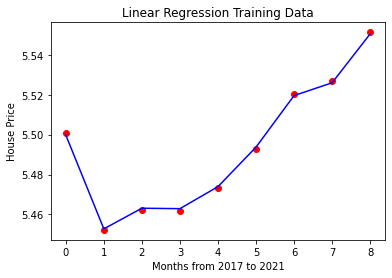

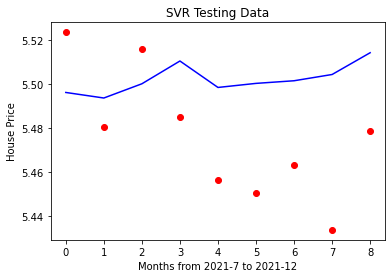

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] TEST: [18 19 20 21 22 23 24 25 26]
Test set evaluation:
_____________________________________
MAE: 0.023980130193024744
MSE: 0.0007244051097486566
RMSE: 0.026914774934014524
R2 Square 0.022466604160258474
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0011071412506837852
MSE: 1.2976581394616638e-06
RMSE: 0.00113914798839381
R2 Square 0.9986702077766128
__________________________________
           Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.02398  0.000724  0.026915   0.022467                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


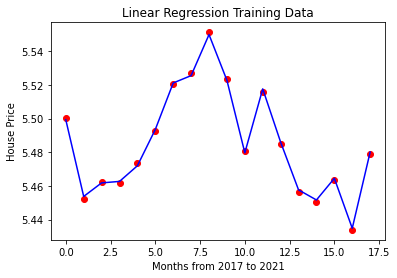

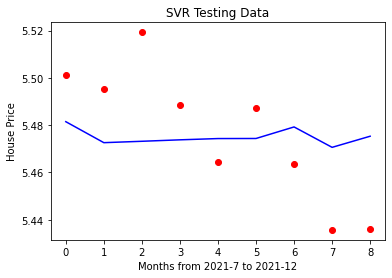

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26] TEST: [27 28 29 30 31 32 33 34 35]
Test set evaluation:
_____________________________________
MAE: 0.05007319222910854
MSE: 0.003921127706119756
RMSE: 0.0626189085350404
R2 Square -1.22673182832752
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0011265374086125424
MSE: 1.7454869668918715e-06
RMSE: 0.0013211687881916796
R2 Square 0.9980873976770458
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.050073  0.003921  0.062619  -1.226732                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


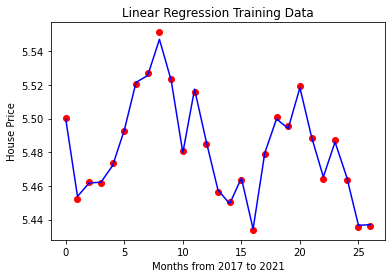

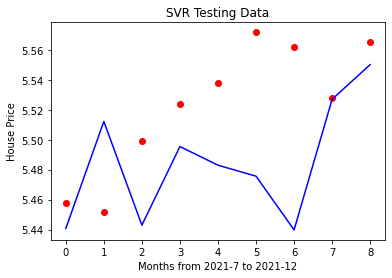

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] TEST: [36 37 38 39 40 41 42 43 44]
Test set evaluation:
_____________________________________
MAE: 0.08052363355238829
MSE: 0.009207111384355263
RMSE: 0.09595369395888448
R2 Square -2.9929428486046534
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0021108536643934775
MSE: 2.304337497371705e-05
RMSE: 0.004800351546888733
R2 Square 0.983745597815346
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.080524  0.009207  0.095954  -2.992943                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


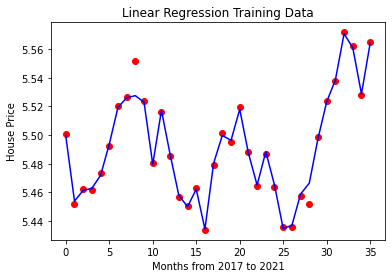

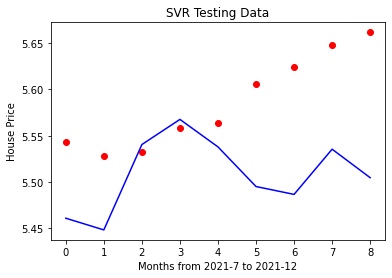

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [45 46 47 48 49 50 51 52 53]
Test set evaluation:
_____________________________________
MAE: 0.12874030380860527
MSE: 0.02032020350261637
RMSE: 0.1425489512504963
R2 Square -49.871404645874
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.001977230715149996
MSE: 1.3460236099763885e-05
RMSE: 0.0036688194422407716
R2 Square 0.9954864877818301
__________________________________
           Model      MAE      MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.12874  0.02032  0.142549 -49.871405                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


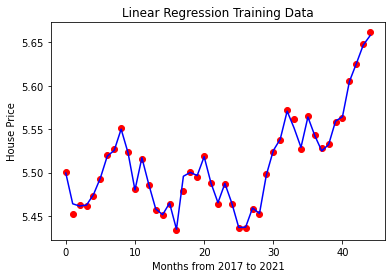

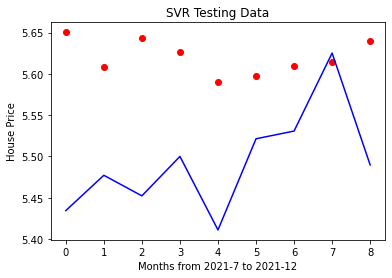

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53] TEST: [54 55 56 57 58 59 60 61 62]
Test set evaluation:
_____________________________________
MAE: 0.11999770608719136
MSE: 0.01788388772931936
RMSE: 0.13373065366369583
R2 Square -32.72577730151163
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.011133129042896971
MSE: 0.0006529611836140794
RMSE: 0.02555310516579305
R2 Square 0.8447492717564414
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.119998  0.017884  0.133731 -32.725777                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


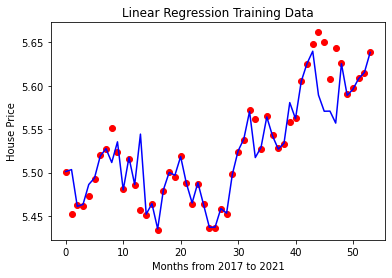

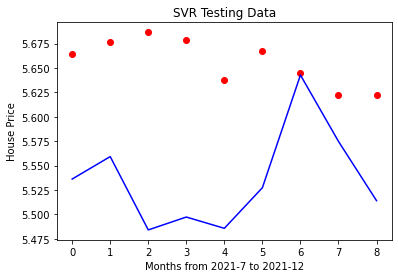

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62] TEST: [63 64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.08508814168034887
MSE: 0.008869980564565942
RMSE: 0.09418057424206938
R2 Square -9.80654577349765
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.015892797840897154
MSE: 0.0009648370478334592
RMSE: 0.03106182621536376
R2 Square 0.8291041598355158
__________________________________
           Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.085088  0.00887  0.094181  -9.806546                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


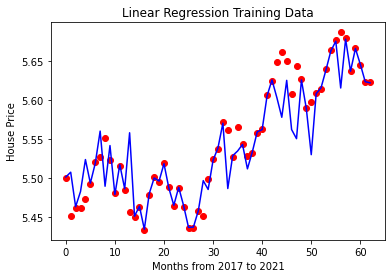

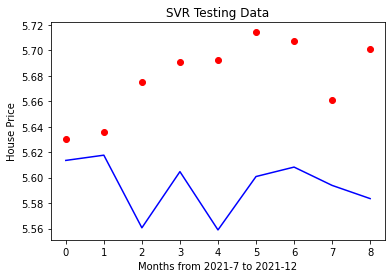

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79 80]
Test set evaluation:
_____________________________________
MAE: 0.04241727617185119
MSE: 0.002680363003384524
RMSE: 0.05177222231452426
R2 Square -1.724186871540335
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.016856263844625265
MSE: 0.001238288597908771
RMSE: 0.035189325056169674
R2 Square 0.8214750448827748
__________________________________
           Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.042417  0.00268  0.051772  -1.724187                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


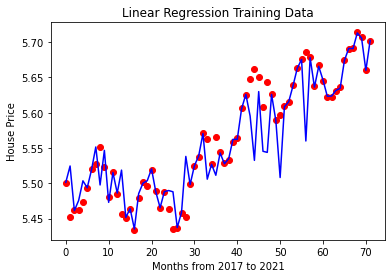

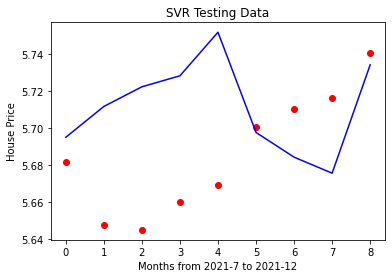

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80] TEST: [81 82 83 84 85 86 87 88 89]
Test set evaluation:
_____________________________________
MAE: 0.03913421386759038
MSE: 0.0030942892650263265
RMSE: 0.05562633607407849
R2 Square -4.441980134602253
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.017274674452294952
MSE: 0.0012686763090292276
RMSE: 0.035618482688475485
R2 Square 0.836410120614958
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.039134  0.003094  0.055626   -4.44198                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


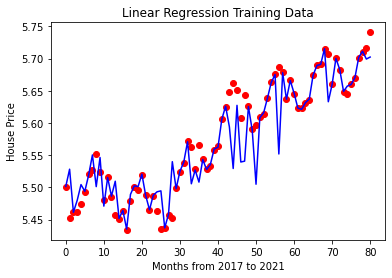

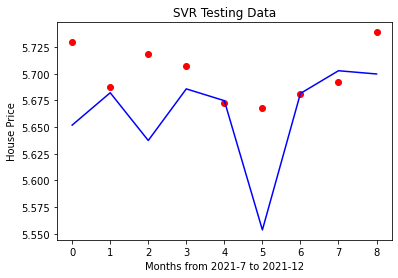

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90 91 92 93 94 95 96 97 98]
Test set evaluation:
_____________________________________
MAE: 0.05640616315733214
MSE: 0.004538474834448436
RMSE: 0.06736820343788631
R2 Square -10.558367297530417
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.01755652999320129
MSE: 0.0011993044799378262
RMSE: 0.034630975728931264
R2 Square 0.856947999097498
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.056406  0.004538  0.067368 -10.558367                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


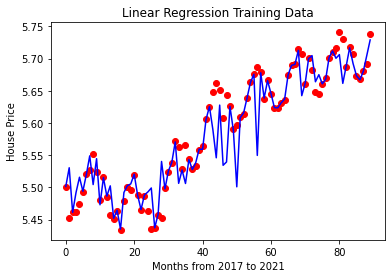

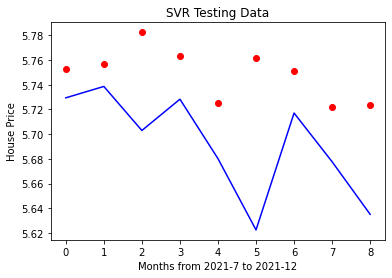

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98] TEST: [ 99 100 101 102 103 104 105 106 107]
Test set evaluation:
_____________________________________
MAE: 0.06415371789688212
MSE: 0.004627370499607119
RMSE: 0.0680247785708055
R2 Square -6.038890009164006
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.017751203752429865
MSE: 0.001157276705337154
RMSE: 0.0340187698974721
R2 Square 0.8814067495011341
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.064154  0.004627  0.068025   -6.03889                 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


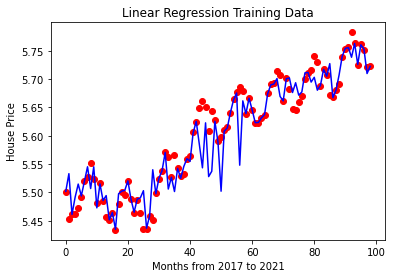

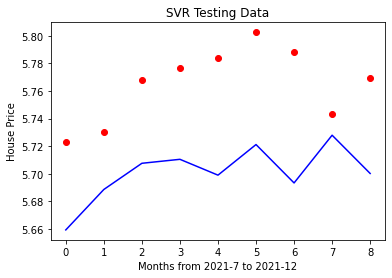

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107] TEST: [108 109 110 111 112 113 114 115 116]
Test set evaluation:
_____________________________________
MAE: 0.06292571953591865
MSE: 0.010119510223355384
RMSE: 0.10059577636936545
R2 Square -8.22796203745536
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.018583135719423667
MSE: 0.0011535152396730595
RMSE: 0.0339634397503118
R2 Square 0.894976216323005
__________________________________
           Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  SVM Regressor  0.062926  0.01012

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


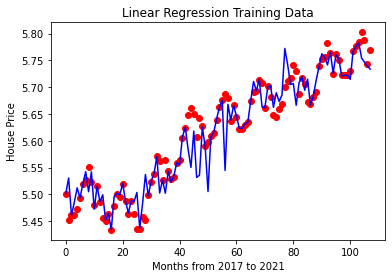

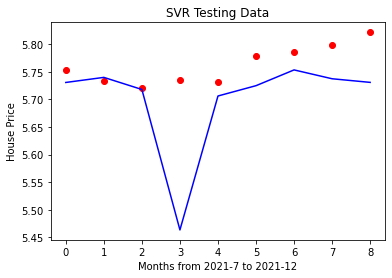

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116] TEST: [117 118 119 120 121 122 123 124 125]
Test set evaluation:
_____________________________________
MAE: 0.07953744640098975
MSE: 0.009102129217524933
RMSE: 0.09540507962118648
R2 Square -15.550194304163135
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0196562474264899
MSE: 0.0012554038991338787
RMSE: 0.03543167931574622
R2 Square 0.8927941338848144
__________________________________
           Model       MAE       MSE      RMSE  R2 Square  Cross Valida

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


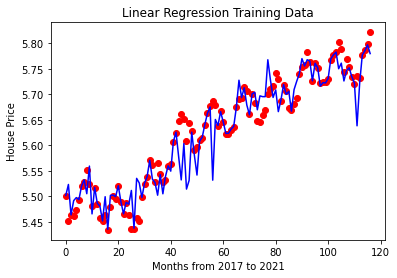

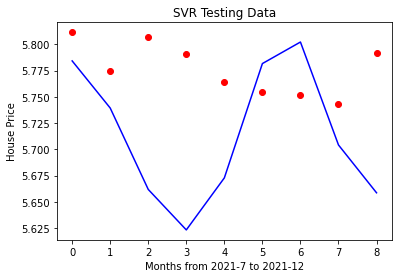

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125] TEST: [126 127 128 129 130 131 132 133 134]
Test set evaluation:
_____________________________________
MAE: 0.14930866040927476
MSE: 0.02846203343139069
RMSE: 0.16870694541538797
R2 Square -55.74685144416813
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.019259067731176173
MSE: 0.001298150738273492
RMSE: 0.03602985898214829
R2 Square 0.895050022961198
__________________________________
           Model       MAE       MSE 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


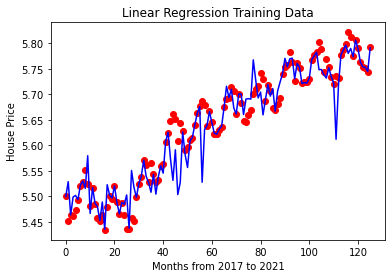

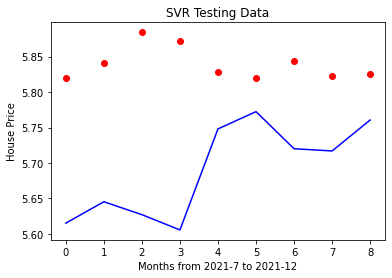

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134] TEST: [135 136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.09046016530761719
MSE: 0.008915475014610048
RMSE: 0.09442179311266043
R2 Square -9.693447609349056
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.020321172470709983
MSE: 0.001372166125910314
RMSE: 0.03704276077603172
R2 Square 0.9025373258660301
_________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


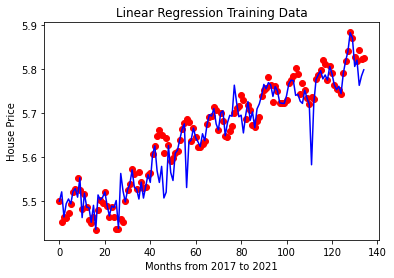

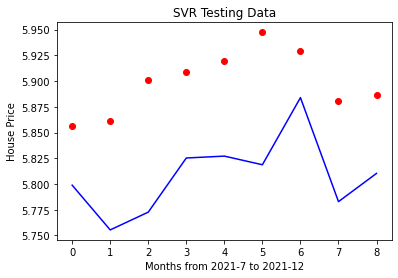

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

tscv = TimeSeriesSplit(n_splits=15, test_size=9)
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train = pipeline.fit_transform(X_train)
  X_test = pipeline.transform(X_test)

  svm_reg = SVR(kernel='rbf', C=1, epsilon=0.001)
  svm_reg.fit(X_train, y_train)

  test_pred = svm_reg.predict(X_test)
  train_pred = svm_reg.predict(X_train)

  print('Test set evaluation:\n_____________________________________')
  print_evaluate(y_test, test_pred)
  print('Train set evaluation:\n_____________________________________')
  print_evaluate(y_train, train_pred)

  results_df = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred) , 0]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
  print(results_df)
  plot.scatter([i for i in range(len(X_train))], y_train, color = 'red')
  plot.plot([i for i in range(len(X_train))], train_pred, color = 'blue')
  plot.title('Linear Regression Training Data')
  plot.xlabel('Months from 2017 to 2021')
  plot.ylabel('House Price')
  plot.show()

  plot.scatter([i for i in range(len(X_test))], y_test, color = 'red')
  plot.plot([i for i in range(len(X_test))], test_pred, color = 'blue')
  plot.title('SVR Testing Data')
  plot.xlabel('Months from 2021-7 to 2021-12')
  plot.ylabel('House Price')
  plot.show()

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31 32 33 34 35]
Test set evaluation:
_____________________________________
MAE: 0.040528742396643835
MSE: 0.002163907423272497
RMSE: 0.04651781834171178
R2 Square 0.12245480918385221
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.015196769589426654
MSE: 0.0003370149157151197
RMSE: 0.018357966001578706
R2 Square 0.5845402271692948
__________________________________


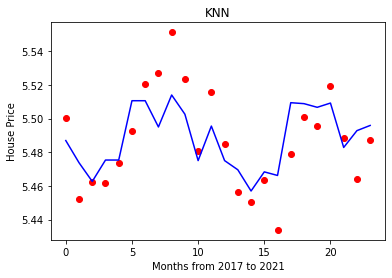

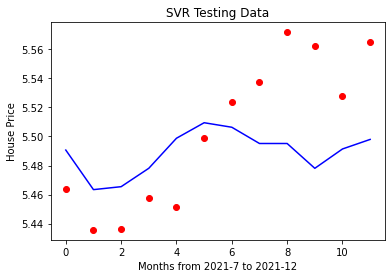

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] TEST: [36 37 38 39 40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.10372814920189259
MSE: 0.01290417853909749
RMSE: 0.11359656041930799
R2 Square -4.712585957880143
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.023543151578816653
MSE: 0.0009712480726640488
RMSE: 0.031164853162882845
R2 Square 0.31489823812015105
__________________________________


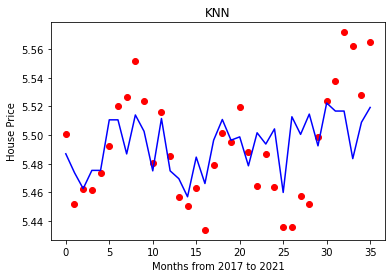

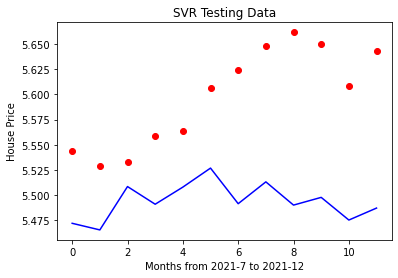

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55 56 57 58 59]
Test set evaluation:
_____________________________________
MAE: 0.11081914397754773
MSE: 0.013813820690450326
RMSE: 0.11753221128886467
R2 Square -12.35150558510435
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.037361394851957996
MSE: 0.002349465542899415
RMSE: 0.048471285756614864
R2 Square 0.36593126754893834
__________________________________


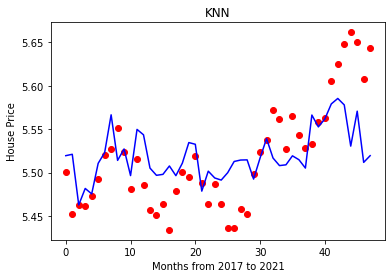

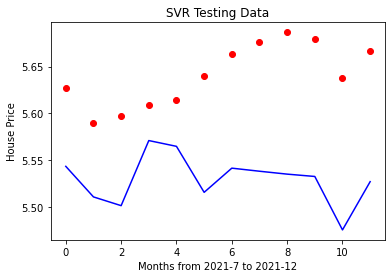

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59] TEST: [60 61 62 63 64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.09196308216655313
MSE: 0.011031908520840414
RMSE: 0.10503289256628331
R2 Square -9.15131715967302
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04458201208575989
MSE: 0.0029540789498795827
RMSE: 0.054351439262264094
R2 Square 0.4687883822364248
__________________________________


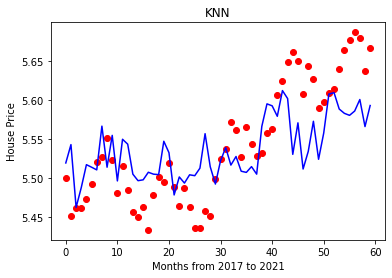

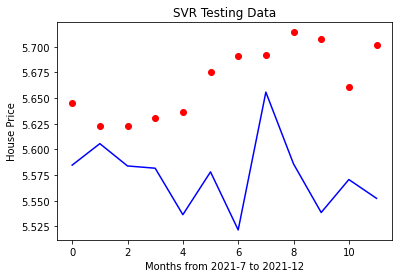

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79 80 81 82 83]
Test set evaluation:
_____________________________________
MAE: 0.03249222550908611
MSE: 0.0014843698003839947
RMSE: 0.03852752003936919
R2 Square -0.5747669159115809
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.047334594849547246
MSE: 0.0035337809424211245
RMSE: 0.05944561331520707
R2 Square 0.49053226751401013
__________________________________


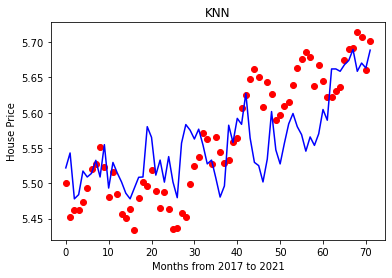

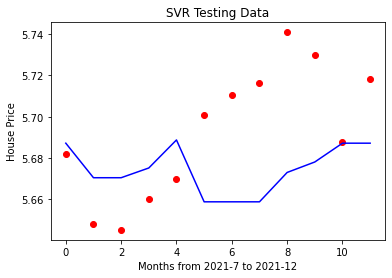

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83] TEST: [84 85 86 87 88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.04479752486732003
MSE: 0.0031728483397312074
RMSE: 0.05632804221461285
R2 Square -1.182880086457713
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04448213734836731
MSE: 0.0032980793627505186
RMSE: 0.05742890703078476
R2 Square 0.5935534161509877
__________________________________


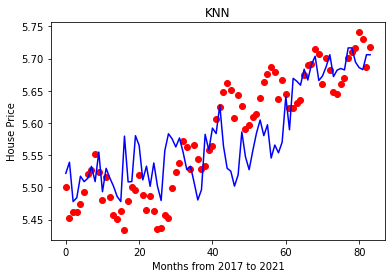

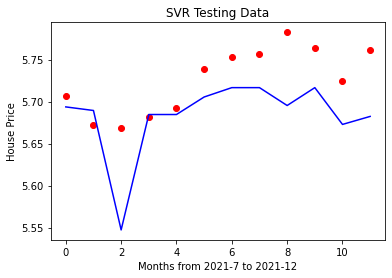

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103 104 105 106 107]
Test set evaluation:
_____________________________________
MAE: 0.049536679022200415
MSE: 0.003018934387495254
RMSE: 0.05494483039827545
R2 Square -3.083994081951851
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04274769262556851
MSE: 0.0031151520516630436
RMSE: 0.0558135472055221
R2 Square 0.6729871489021656
__________________________________


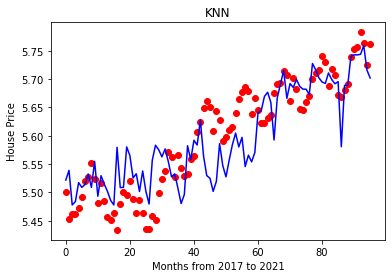

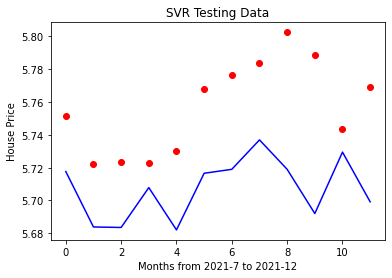

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107] TEST: [108 109 110 111 112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.07390553299822293
MSE: 0.008655991760584373
RMSE: 0.09303758251687526
R2 Square -6.664869110848546
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04274961373225056
MSE: 0.0030077780850799357
RMSE: 0.054843213664772926
R2 Square 0.7261516587805346
__________________________________


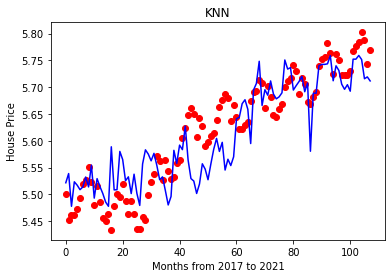

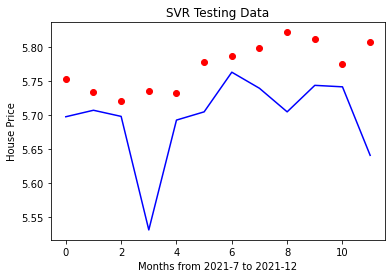

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127 128 129 130 131]
Test set evaluation:
_____________________________________
MAE: 0.11773335938513936
MSE: 0.020135741914099243
RMSE: 0.1419004648128372
R2 Square -8.960985854524557
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04327083098388905
MSE: 0.003230191955743297
RMSE: 0.05683477769590813
R2 Square 0.7335390712903147
__________________________________


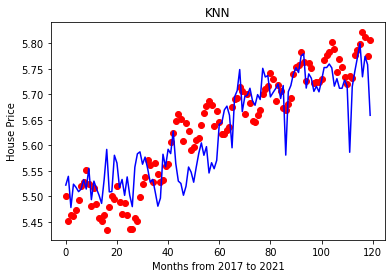

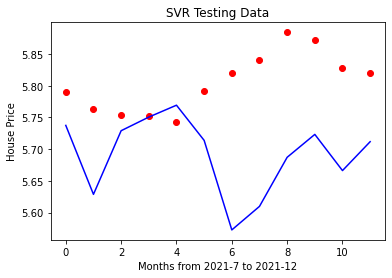

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131] TEST: [132 133 134 135 136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.11332840857787319
MSE: 0.01365959690636175
RMSE: 0.11687427820680542
R2 Square -7.935884490288029
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04289594802099288
MSE: 0.0030954579023757495
RMSE: 0.05563683943553722
R2 Square 0.7734107863065183
__________________________________

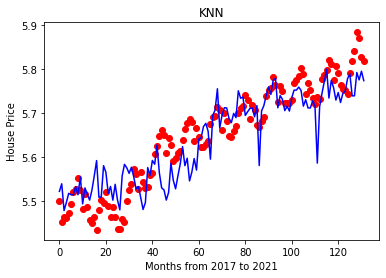

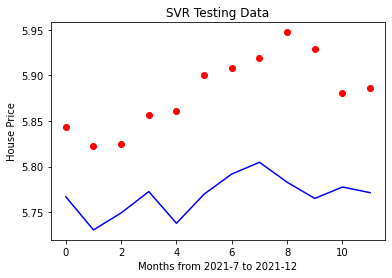

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


tscv = TimeSeriesSplit(n_splits=10, test_size=12)
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train = pipeline.fit_transform(X_train)
  X_test = pipeline.transform(X_test)
    
  knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5, p=1)
  knn.fit(X_train, y_train)

  test_pred = knn.predict(X_test)
  train_pred = knn.predict(X_train)

  print('Test set evaluation:\n_____________________________________')
  print_evaluate(y_test, test_pred)
  print('Train set evaluation:\n_____________________________________')
  print_evaluate(y_train, train_pred)

  results_df_2 = pd.DataFrame(data=[["KNN", *evaluate(y_test, test_pred), cross_val(KNeighborsRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
  
  plot.scatter([i for i in range(len(X_train))], y_train, color = 'red')
  plot.plot([i for i in range(len(X_train))], train_pred, color = 'blue')
  plot.title('KNN')
  plot.xlabel('Months from 2017 to 2021')
  plot.ylabel('House Price')
  plot.show()

  plot.scatter([i for i in range(len(X_test))], y_test, color = 'red')
  plot.plot([i for i in range(len(X_test))], test_pred, color = 'blue')
  plot.title('SVR Testing Data')
  plot.xlabel('Months from 2021-7 to 2021-12')
  plot.ylabel('House Price')
  plot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
X = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/fake_data1.csv')
X = X[0:144]
X['Price'] = np.log10(X['Price'])
model=ARIMA(X['Price'],order=(10,0,5))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converge

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                  144
Model:                    ARMA(10, 5)   Log Likelihood                 388.649
Method:                       css-mle   S.D. of innovations              0.015
Date:                Thu, 07 Apr 2022   AIC                           -743.298
Time:                        20:04:06   BIC                           -692.811
Sample:                             0   HQIC                          -722.783
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.1803      0.276     33.305      0.000       8.640       9.721
ar.L1.Price      1.4410      0.006    232.842      0.000       1.429       1.453
ar.L2.Price     -0.7382        nan        nan        nan         nan         nan
ar.L3.Price      0.8927      0.013     66.348      0.000       0.866       0.919
ar.L4.Price     -0.9534      0.018    -51.720      0.000      -0.990      -0.917
ar.L5.Price      0.0522        nan        nan        nan         nan         nan
ar.L6.Price      0.2539        nan        nan        nan         nan         nan
ar.L7.Price     -0.3894        nan        nan        nan         nan         nan
ar.L8.Price      0.6800        nan        nan        nan         nan         nan
ar.L9.Price     -0.1402        nan        nan        nan         nan         nan
ar.L10.Price    -0.0989        nan        nan        nan         nan         nan
ma.L1.Price     -0.3057      0.058     -5.260      0.000      -0.420      -0.192
ma.L2.Price      0.0840      0.053      1.579      0.117      -0.020       0.188
ma.L3.Price     -0.5892      0.036    -16.521      0.000      -0.659      -0.519
ma.L4.Price      0.6924      0.056     12.307      0.000       0.582       0.803
ma.L5.Price      0.3647      0.079      4.619      0.000       0.210       0.519
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.4991           -0.8666j            1.0000           -0.3332
AR.2            -0.4991           +0.8666j            1.0000            0.3332
AR.3             0.0888           -1.1573j            1.1607           -0.2378
AR.4             0.0888           +1.1573j            1.1607            0.2378
AR.5             0.8692           -0.5000j            1.0028           -0.0831
AR.6             0.8692           +0.5000j            1.0028            0.0831
AR.7             1.0002           -0.0000j            1.0002           -0.0000
AR.8             1.5906           -0.0000j            1.5906           -0.0000
AR.9            -1.2902           -0.0000j            1.2902           -0.5000
AR.10           -3.6356           -0.0000j            3.6356           -0.5000
MA.1             0.8610           -0.5438j            1.0184           -0.0897
MA.2             0.8610           +0.5438j            1.0184            0.0897
MA.3            -0.4883           -0.8727j            1.0000           -0.3312
MA.4            -0.4883           +0.8727j            1.0000            0.3312
MA.5            -2.6441           -0.0000j            2.6441           -0.5000
------------------------------------------------------------------------------
"""

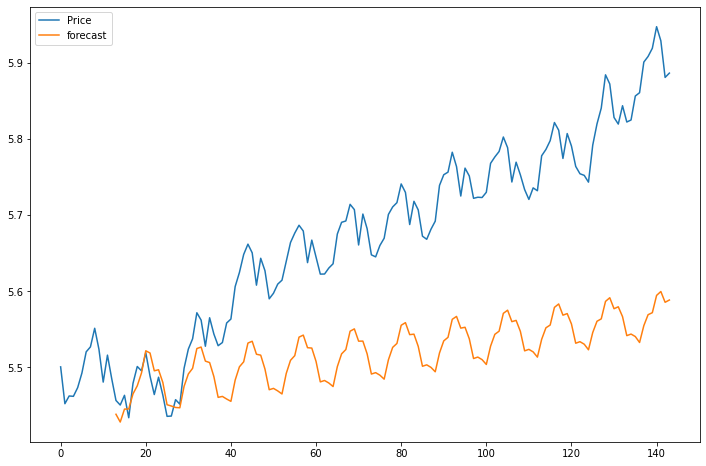

In [ ]:
X['forecast']=model_fit.predict(start=13,end=156,dynamic=True)
X[['Price', 'forecast']].plot(figsize=(12,8))

In [ ]:
results_df_2 = pd.DataFrame(data=[["ARIMA", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

In [ ]:
# ARMA

In [ ]:
new = X[['Price', 'Date']]
new.head()

,Price,Date
0,5.500646,2010-01
1,5.452245,2010-02
2,5.462398,2010-03
3,5.461963,2010-04
4,5.473356,2010-05


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(figsize=(20, 14), facecolor='white')
    timeSeries.plot(color='blue')
    
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    #plt.figure(figsize=(8, 6), dpi=80)
    f = plt.figure(figsize=(15, 9), facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

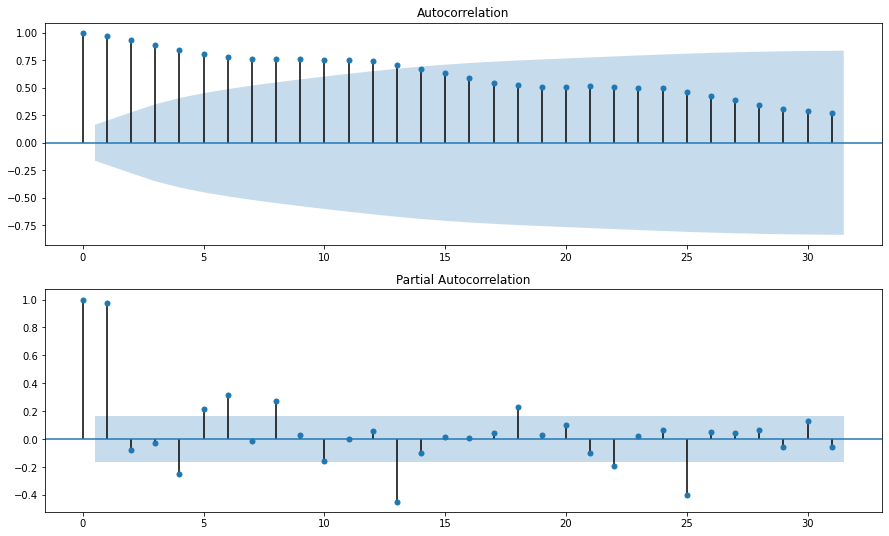

In [ ]:
draw_acf_pacf(new['Price'])

<Figure size 1440x1008 with 0 Axes>

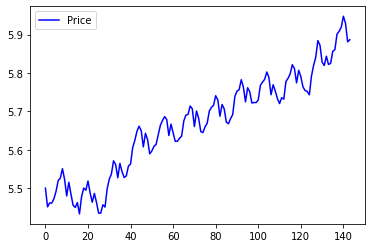

In [ ]:
draw_ts(new)

In [ ]:
train = new['Price'][0:132]
test = new['Price'][133:144]

In [ ]:
rol_mean = new['Price'].rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)

Test Statistic                  -3.666615
p-value                          0.004608
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

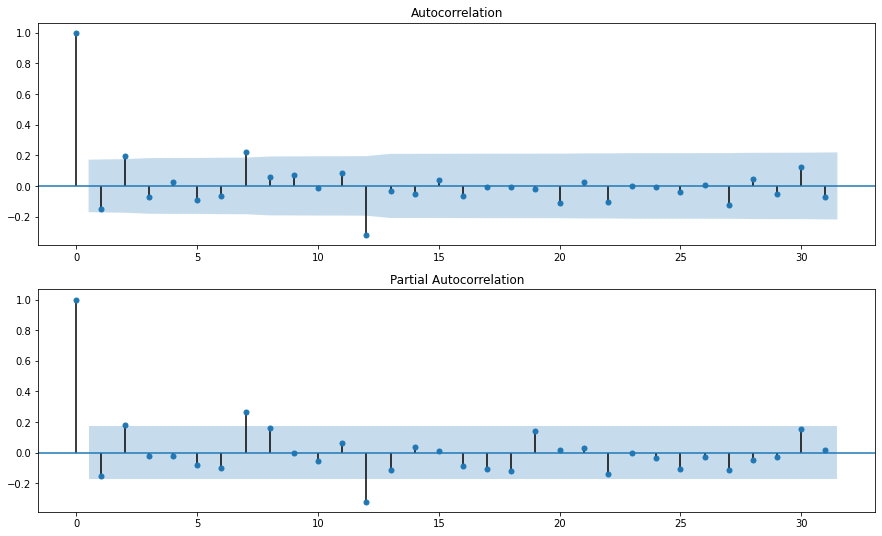

In [ ]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
draw_acf_pacf(ts_diff_2)

In [ ]:
ts_diff_1

12    -0.001295
13     0.000356
14    -0.000991
15     0.000111
16    -0.003293
         ...   
139    0.006551
140    0.005269
141    0.004724
142    0.004383
143    0.005579
Name: Price, Length: 132, dtype: float64

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff_1, order=(1,1,1)) 
result_arma = model.fit(disp=-1, method='css')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
predict_ts = result_arma.predict()
print(predict_ts)
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
print(diff_recover_1)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
print(diff_recover)

# 移动平均还原
rol_sum = new['Price'].rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
rol_recover

# # 对数还原
# log_recover = np.exp(rol_recover)
# log_recover.dropna(inplace=True)

13    -0.001000
14     0.000431
15    -0.000584
16     0.000260
17    -0.002559
         ...   
139    0.007301
140    0.006458
141    0.005290
142    0.004720
143    0.004378
Length: 131, dtype: float64
12          NaN
13    -0.002295
14     0.000787
15    -0.001575
16     0.000371
         ...   
139    0.014683
140    0.013009
141    0.010558
142    0.009444
143    0.008761
Length: 132, dtype: float64
11          NaN
12          NaN
13     5.493260
14     5.496698
15     5.493346
         ...   
139    5.869847
140    5.874724
141    5.877543
142    5.881153
143    5.884853
Length: 133, dtype: float64


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
139    6.016694
140    6.040339
141    5.998904
142    5.941546
143    5.924681
Length: 144, dtype: float64

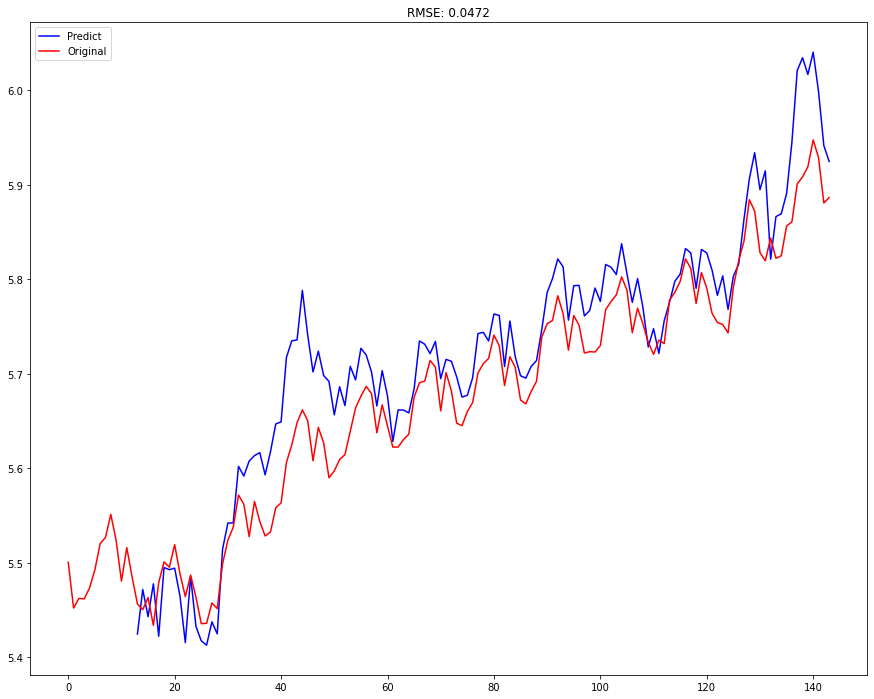

In [ ]:
ts = new['Price'][rol_recover.index]  # 过滤没有预测的记录
plt.figure(figsize=(15, 12), facecolor='white')
rol_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((rol_recover[13:]-ts[13:])**2)/ts.size))
plt.show()

In [ ]:
rol_recover[132:144]

132    5.821240
133    5.866303
134    5.869310
135    5.890714
136    5.944966
137    6.020818
138    6.034398
139    6.016694
140    6.040339
141    5.998904
142    5.941546
143    5.924681
dtype: float64

In [ ]:
ts[132:144]

132    5.843644
133    5.822247
134    5.824919
135    5.856391
136    5.860745
137    5.900979
138    5.908351
139    5.919115
140    5.947458
141    5.928892
142    5.880814
143    5.886491
Name: Price, dtype: float64

In [ ]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
  

print_evaluate(rol_recover[13:120], ts[13:120])
print_evaluate(rol_recover[120:144], ts[120:144])

MAE: 0.03745953336422915
MSE: 0.002093775935012166
RMSE: 0.04575779643964694
R2 Square 0.8443551067117696
__________________________________
MAE: 0.05444778219227164
MSE: 0.004049127006837506
RMSE: 0.0636327510550778
R2 Square 0.3960102934963743
__________________________________


In [ ]:
pred_10 = [10 ** item for item in rol_recover[13:]]
true_10 = [10 ** item for item in new['Price'][13:]]


In [ ]:
len(pred_10)

131

In [ ]:
np.sqrt(sum((pd.Series(pred_10[120:131])-pd.Series(true_10[120:131]))**2)/len(pred_10[120:131]))

166408.41873177528

In [ ]:
np.sqrt(sum((pd.Series(pred_10[132:144])-pd.Series(true_10[132:144]))**2)/len(pred_10[132:144]))

69963.01502720993

In [ ]:
predict= result_arma.predict(start = 132, end = 156, dynamic= True)
#future_df[['Price', 'forecast']].plot(figsize=(12, 8))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
predict

132    0.005364
133    0.005271
134    0.005184
135    0.005102
136    0.005024
137    0.004951
138    0.004883
139    0.004818
140    0.004757
141    0.004699
142    0.004645
143    0.004594
144    0.004546
145    0.004501
146    0.004459
147    0.004419
148    0.004381
149    0.004345
150    0.004312
151    0.004280
152    0.004250
153    0.004223
154    0.004196
155    0.004171
156    0.004148
dtype: float64

In [ ]:
all_predict = list(predict_ts) + list(predict)[12:]
len(all_predict)

144

In [ ]:
all_predict = pd.Series([np.NaN]*13 + list(all_predict))
len(all_predict)

157

In [ ]:
diff_shift_ts = ts_diff_1.shift(1)
print(diff_shift_ts)
predict_diff_recover_1 = predict.add(diff_shift_ts)
print(predict_diff_recover_1)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
predict_diff_recover = predict_diff_recover_1.add(rol_shift_ts)

# 移动平均还原
rol_sum = new['Price'].rolling(window=11).sum()
predictioin = predict_diff_recover*12 - rol_sum.shift(1)

12          NaN
13    -0.001295
14     0.000356
15    -0.000991
16     0.000111
         ...   
139    0.007382
140    0.006551
141    0.005269
142    0.004724
143    0.004383
Name: Price, Length: 132, dtype: float64
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
       ..
152   NaN
153   NaN
154   NaN
155   NaN
156   NaN
Length: 145, dtype: float64


In [ ]:
ts = new['Price'][all_predictioin.index]  # 过滤没有预测的记录
plt.figure(figsize=(15, 12), facecolor='white')
all_predictioin.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((all_predictioin[13:]-ts[13:])**2)/ts.size))
plt.show()

nan